# Визуализация данных "Отзывы о разных сортах вина"

## 1. Импорты необходимых пакетов

In [1]:
import MySQLdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## 2. Подключение к базе данных

In [19]:
conn = MySQLdb.connect(
      host="rc1b-olbk6qq6dcsw8zkq.mdb.yandexcloud.net",
      port=3306,
      db="winemag",
      user="student",
      passwd="n123456789")

test = pd.read_sql_query("SHOW TABLES;", con=conn)
# test = pd.read_sql_query("DESCRIBE wines;", con=conn)
test

/var/folders/9m/2mgq9cmj1j3csbnmjzvjlgd80000gp/T/ipykernel_85242/2866597538.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  test = pd.read_sql_query("SHOW TABLES;", con=conn)


,Tables_in_winemag
0,wines


Импортируем запрос в DataFrame (либо из csv-файла)

In [16]:
reviews = pd.read_sql_query("SELECT * FROM wines;", con=conn)

# Импорт из файла
# reviews = pd.read_csv(f'{os.getcwd()}/winemag-data_first150k.csv.gz',compression='gzip' )

/var/folders/9m/2mgq9cmj1j3csbnmjzvjlgd80000gp/T/ipykernel_85242/1323892527.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  reviews = pd.read_sql_query("SELECT * FROM wines;", con=conn)


In [17]:
# Проверяем
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,None,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,None,Provence red blend,Domaine de la Bégude


## 3. Визуализация с помощью matplotlib

### 3.1. Одномерные графики
Анализ одной переменной

| Столбчатая диаграмма (bar chart) | Линейный график (line chart) | График с областями (area chart) | Гитограмма (histogram) |
| --- | --- | --- | --- |
| ![pic1](https://i.imgur.com/skaZPhb.png) | ![pic1](https://i.imgur.com/gaNttYd.png) | ![pic1](https://i.imgur.com/pampioh.png) | ![pic1](https://i.imgur.com/OSbuszd.png) |

#### Шкалы измерения
**Количественные данные** <br>
- Непрерывные величины
- Дискретная величина <br>

**Категориальные переменные** <br>
- Номинальными категориями 
- Порядковые категории

Датасет с отзывами о разных видах вин

In [3]:
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


#### Столбчатая диаграмма

<AxesSubplot: >

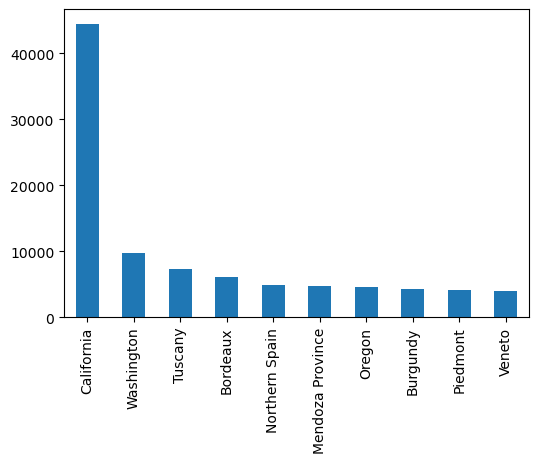

In [31]:
reviews['province'].value_counts().head(10).plot.bar()

<AxesSubplot: >

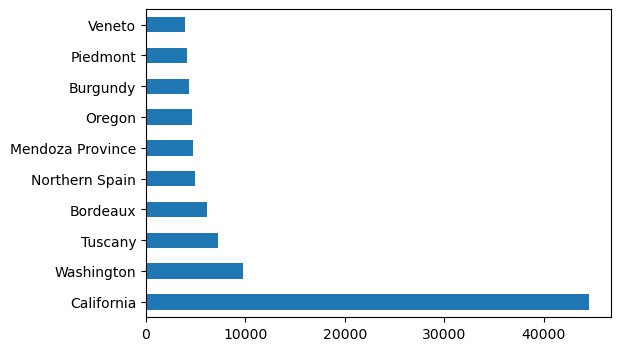

In [32]:
reviews['province'].value_counts().head(10).plot.barh()

Количество посчитано, но например необходимо посчитать долю от всего.

<AxesSubplot: >

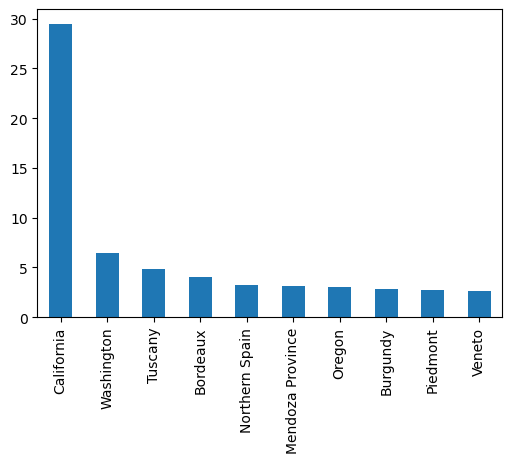

In [6]:
(reviews['province'].value_counts().head(10) / len(reviews)*100).plot.bar()

#### Порядковые категории
Оценка для каждого вина ниже.<br>

Если мы посчитаем сколько вин набрало какое количество баллов, то метод ```value_counts()``` отсортирует результаты по значеним (от большего к меньшему по умолчанию), но при этом в индексах будет неразбериха, тк после 88 балла идет сразу 90, а после него 86. Но мы же знаем что баллы имеют нарастающую характеристику- **чем выше оценка, тем выше и заведение**. Все что нам нужно сделать это отсортировать по индексу и построить ```barchart```<br>

In [9]:
# итоговые баллы за вино
reviews['points'].value_counts().head()

87    20747
88    17871
90    15973
86    15573
89    12921
Name: points, dtype: int64

<AxesSubplot: >

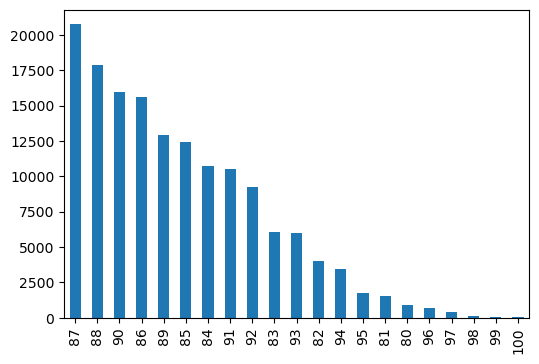

In [10]:
reviews['points'].value_counts().plot.bar()

In [11]:
reviews['points'].value_counts().sort_index().head()

80      898
81     1502
82     4041
83     6048
84    10708
Name: points, dtype: int64

<AxesSubplot: >

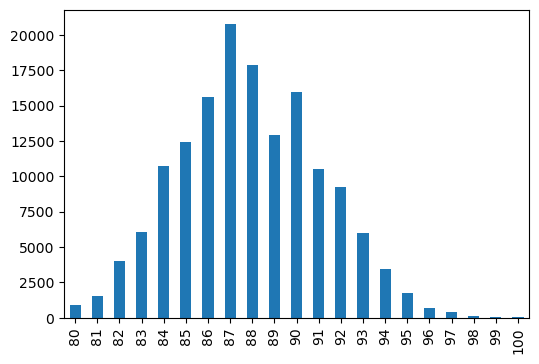

In [12]:
reviews['points'].value_counts().sort_index().plot.bar()

#### Линейный график

<AxesSubplot: >

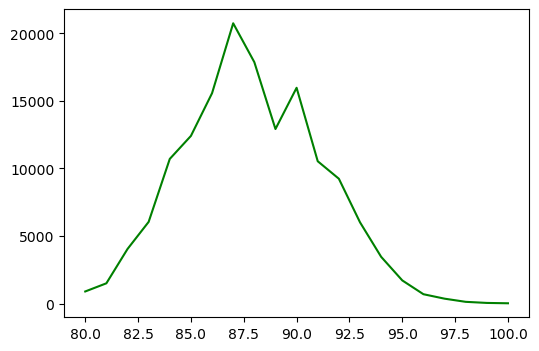

In [13]:
reviews['points'].value_counts().sort_index().plot.line(color='green')

<AxesSubplot: >

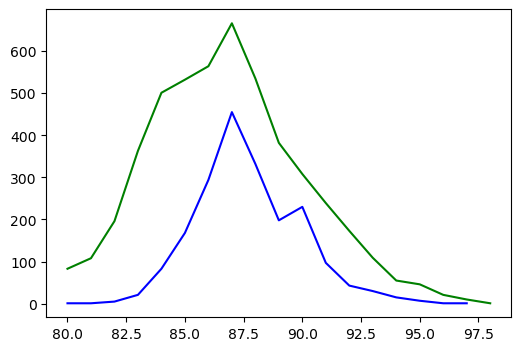

In [14]:
# подходит чтобы визуализировать разные срезы или категории и сопоставлять их между собой
reviews[reviews['province'] == 'Northern Spain']['points'].value_counts().sort_index().plot.line(color='green')
reviews[reviews['province'] == 'Northeastern Italy']['points'].value_counts().sort_index().plot.line(color='blue')

#### График с областями (Area chart)

<AxesSubplot: >

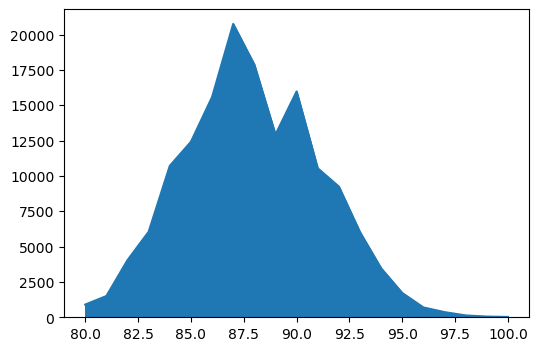

In [15]:
# Закрашенная площадь под графиком
reviews['points'].value_counts().sort_index().plot.area()

#### Гистограмма

<AxesSubplot: ylabel='Frequency'>

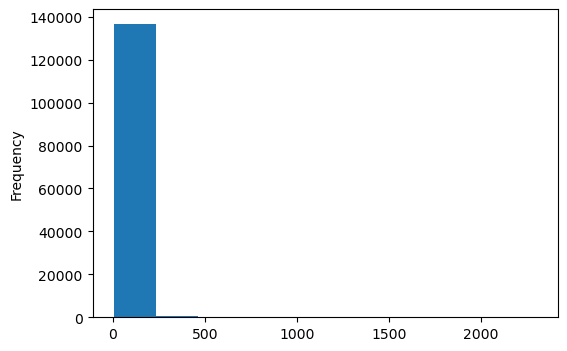

In [16]:
reviews['price'].plot.hist()

In [15]:
reviews.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


<AxesSubplot: ylabel='Frequency'>

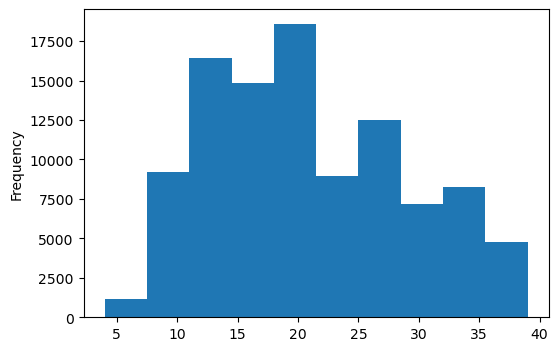

In [16]:
# уберем все что выше 75ого квантиля
reviews[reviews['price'] < 40]['price'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

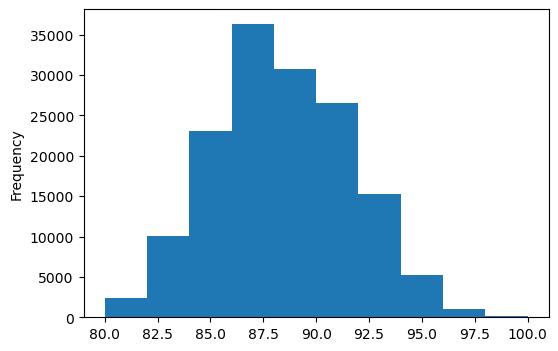

In [17]:
# гистограмму для порядковых значений
reviews['points'].plot.hist()

### 3.2. Многомерные графики

Зависимость нескольких переменных


<table>
<tr>
<td><img src="https://i.imgur.com/bBj1G1v.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ChK9zR3.png" width="350px"/></td>
<td><img src="https://i.imgur.com/KBloVHe.png" width="350px"/></td>
<td><img src="https://i.imgur.com/C7kEWq7.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Диаграмма рассеивания (Scatter plot)</td>
<td style="font-weight:bold; font-size:16px;">Шестигранная диаграмма (Hex plot)</td>
<td style="font-weight:bold; font-size:16px;">Многослойная столбчатая диаграмма (Stacked bar chart)</td>
<td style="font-weight:bold; font-size:16px;">Многомерный линейный график (Bivariate line chart)</td>
</tr>
<tr>
<td>df.plot.scatter()</td>
<td>df.plot.hexbin()</td>
<td>df.plot.bar(stacked=True)</td>
<td>df.plot.line()</td>
</tr>
<tr>
<td>Хорошо подходит для количественных и небольших номинальных категориальных данных.</td>
<td>Хорошо подходит для количественных и больших номинальных категориальных данных.</td>
<td>Хорошо подходит для номинальных и порядковых категорийных данных.</td>
<td>Хорошо подходит для номинальных и порядковых категорийных данных.</td>
</tr>
</table>

| Диаграмма рассеивания (Scatter plot) | Шестигранная диаграмма (Hex plot) | Многослойная столбчатая диаграмма (Stacked bar chart) | Многомерный линейный график (Bivariate line chart) |
| --- | --- | --- | --- |
| ![pic1](https://i.imgur.com/bBj1G1v.png) | ![pic1](https://i.imgur.com/ChK9zR3.png) | ![pic1](https://i.imgur.com/KBloVHe.png) | ![pic1](https://i.imgur.com/C7kEWq7.png) |

#### Диаграмма рассеивания

<AxesSubplot: xlabel='price', ylabel='points'>

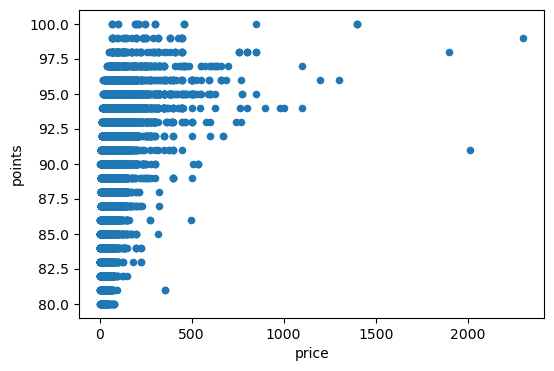

In [19]:
reviews.plot.scatter(x='price', y='points')

Получилось довольно плотная диаграмма. Мы можем избавиться от выбросов в виде догого вина и посмотреть например только вина менее 100 долларов. 

<AxesSubplot: xlabel='price', ylabel='points'>

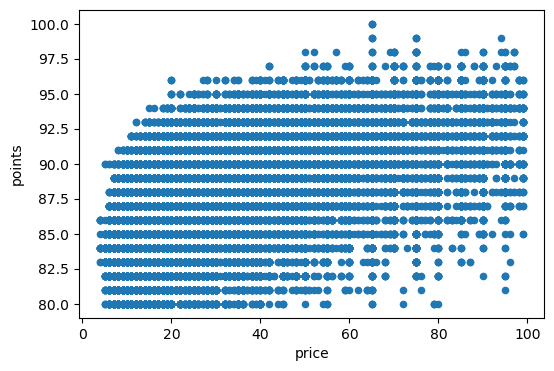

In [20]:
# Уберем выбросы
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

Опять же, в нашем диапазоне слишком много наблюдений. Мы можем выбрать 100, 200, 500, 1000 наблюдений, чтобы график выглядел более разрежаным и более вменяемым.

<AxesSubplot: xlabel='price', ylabel='points'>

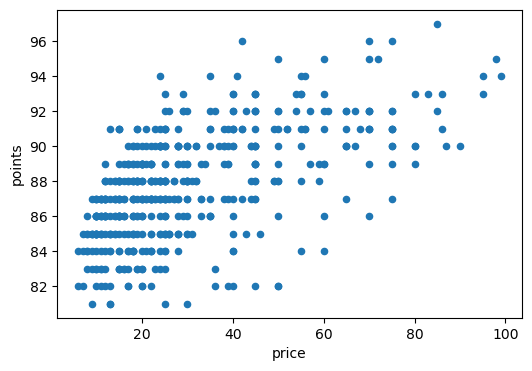

In [22]:
# выбрем 100, 200, 500, 1000 наблюдений, чтобы график выглядел более разрежаным
reviews[reviews['price'] < 100].sample(500).plot.scatter(x='price', y='points')

На графике можно выявить некую зависимость, что чем дороже вино тем больше балов оно получает, но сказать что между переменными выражена сильная корреляция не представляется возможность, тк есть вина с 92 баллами как за 100, так и за 20 с небольшим долларов.<br>

#### Шестигранная диаграмма/ Гексагон (Hex plot)

- агрегирует точки в полигоны
- передача интенсивности по цвету

<AxesSubplot: xlabel='price', ylabel='points'>

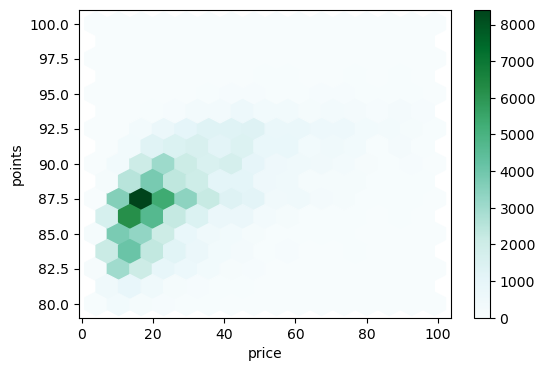

In [21]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

Либо

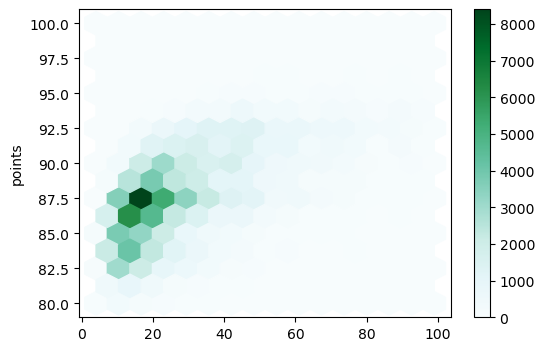

In [23]:
fig,ax = plt.subplots()
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15, ax=ax)
plt.xlabel('')
plt.show()

Большая часть наблюдений скопилась в области 87.5 пунктов и стоит около 20 долларов.<br>
Этого мы не смогли увидеть на графике с диаграммой рассеивания, тк наблюдений слишком много и точки перекрывали друг друга.

## 4. Датасет "Топ-5 видов вина"

### 4.1. Формирование таблицы

In [24]:
# топ-5 видов вина в датасете 
# для каждого балла количество упоминаний по каждому из вин

wine_counts = reviews[
    reviews['variety'].isin(list(reviews['variety'].value_counts().head(5).index))
        ].groupby(['variety','points'])['points'].count().unstack().T

In [25]:
#  данные необходимо сгруппировать так - 
#   одно разбиение по категорийной переменной в столбцам 
#   одно разбиение на другую категорию

wine_counts.head()

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,89.0,70.0,36.0,75.0
81,23.0,160.0,154.0,86.0,108.0
82,83.0,436.0,523.0,296.0,233.0
83,122.0,571.0,686.0,350.0,366.0
84,334.0,925.0,1170.0,757.0,623.0


### 4.2. Визуализация "Топ-5 вина"

#### Многослойная столбчатая диаграмма 
Stacked bar chart

<AxesSubplot: xlabel='points'>

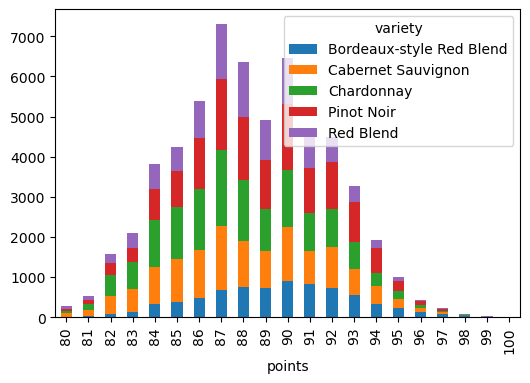

In [29]:
wine_counts.plot.bar(stacked=True)

<AxesSubplot: xlabel='points'>

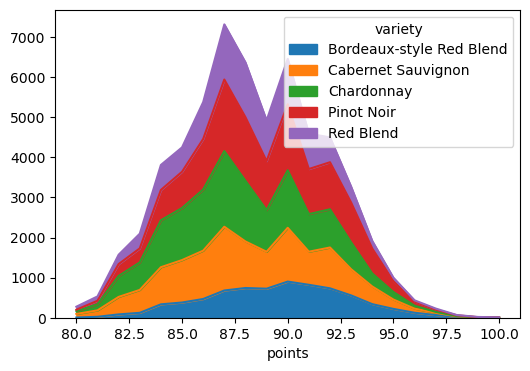

In [27]:
wine_counts.plot.area()

#### Многомерный линейный график 
Bivariate line chart

<AxesSubplot: xlabel='points'>

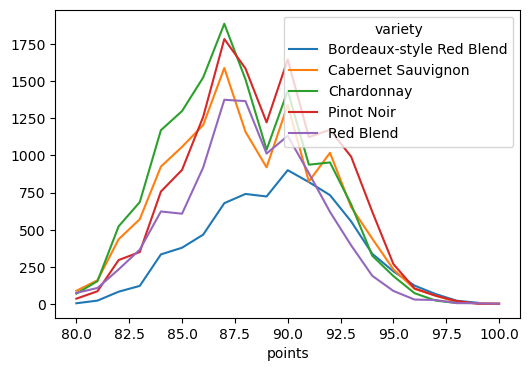

In [35]:
wine_counts.plot.line()

самая популярна оценка среди топ-5 это 87 баллов, а так же что Chardonnay получило эту оценку больше всего раз.

Так же можно разбить отрисовку графиков по каждой категории отдельно, если мы не хотим нагромождать наш график.

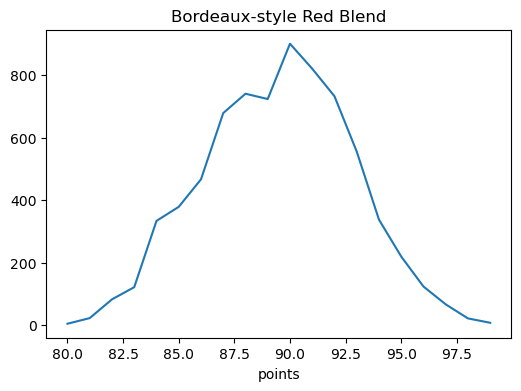

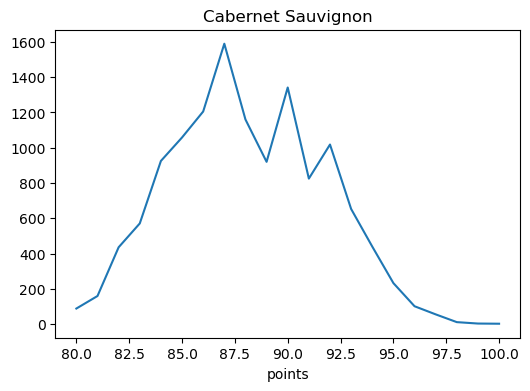

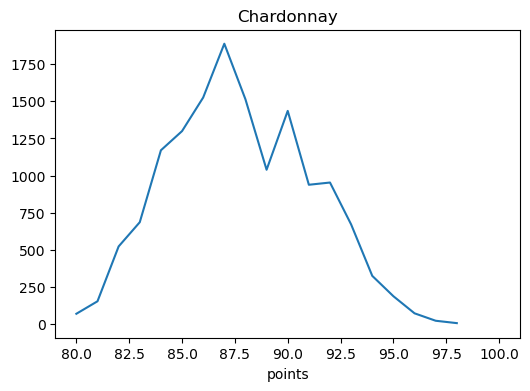

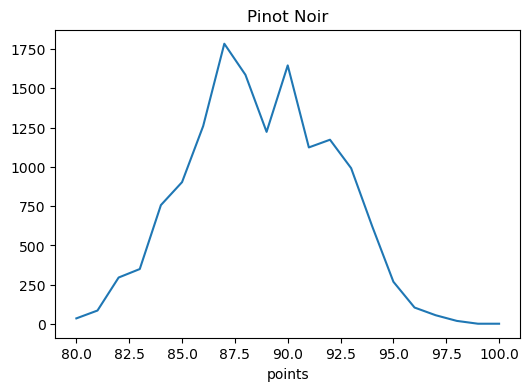

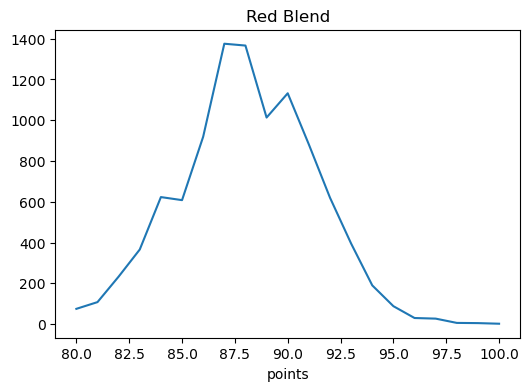

In [36]:
for i in wine_counts.columns:
    wine_counts[i].plot.line()
    plt.title(i)
    plt.show()

## 5. Подграфики или Subplots.
вывод нескольких графиков на одной плоскости

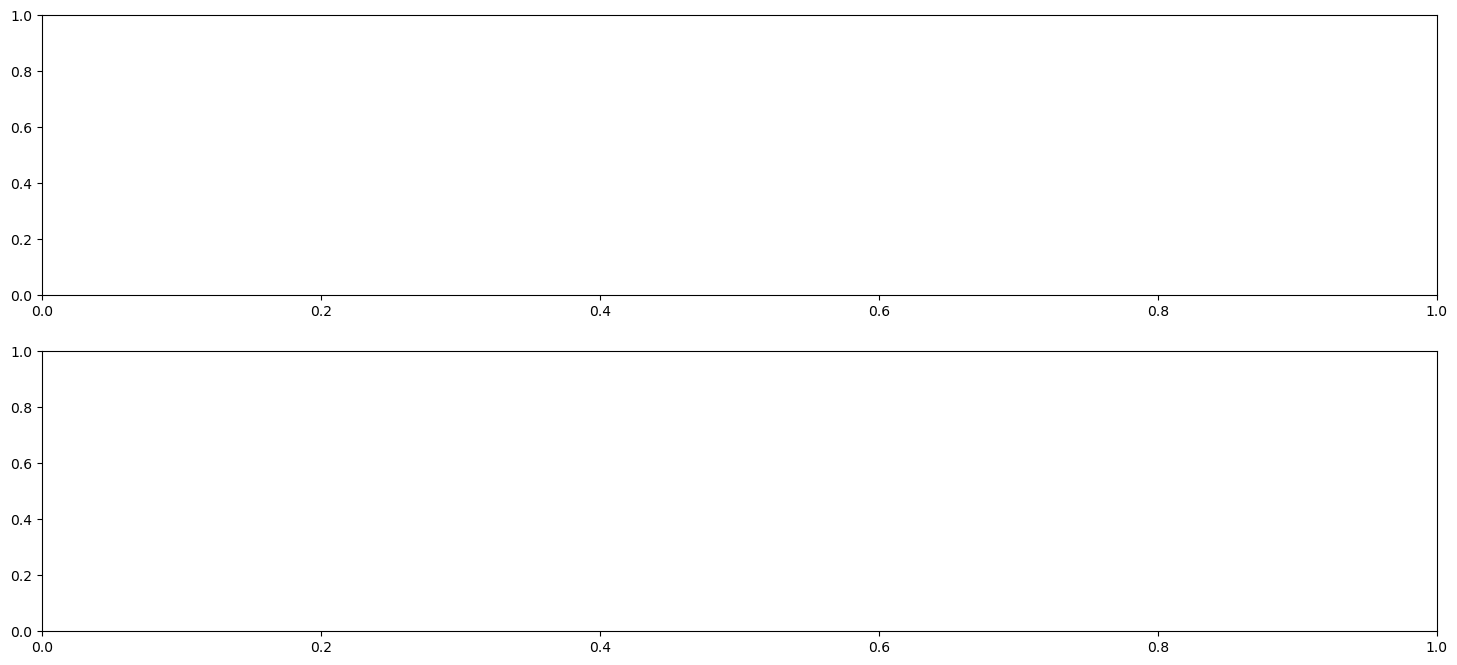

In [37]:
# метод .subplots()
# два аргумента, количество рядов и столбцов
# `.suplots()` возвращает 2 объекта - `figure`(объект фигуры) и `AxesSubplot` (объект осей), 
# которые присваивают к двум переменным fig, axes

fig, axes = plt.subplots(2, 1, figsize=(18, 8))

marplotlib создает новый объект графика и подграфиков.
Затем используются атрибуты title, y_lable, x_lable, Axis


In [38]:
# Это список подграфиков
axes

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

<AxesSubplot: >

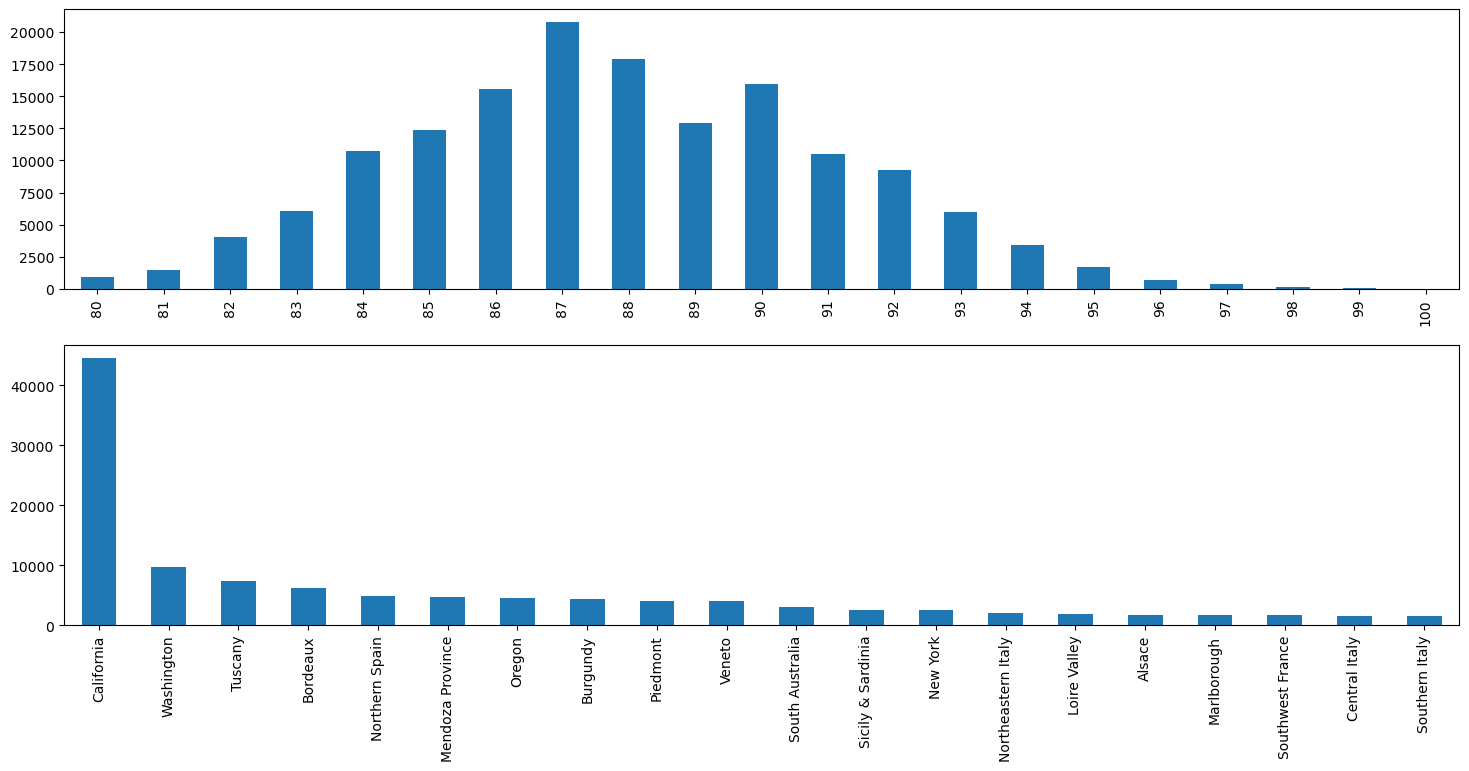

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(18, 8))
# Выбираем подграфик 1
reviews['points'].value_counts().sort_index().plot.bar(ax=axes[0])

# Выбираем подграфик 2
reviews['province'].value_counts().head(20).plot.bar(ax=axes[1])

При увеличении количества подграфиков формируются списки списков

array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

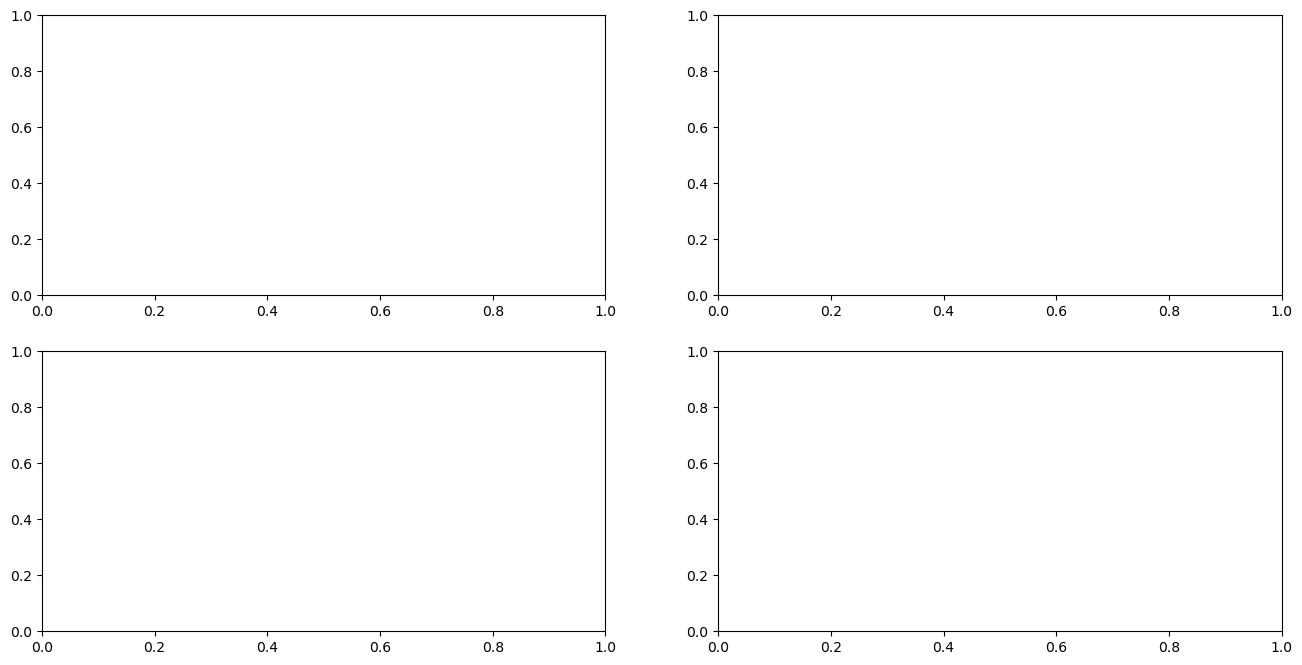

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes

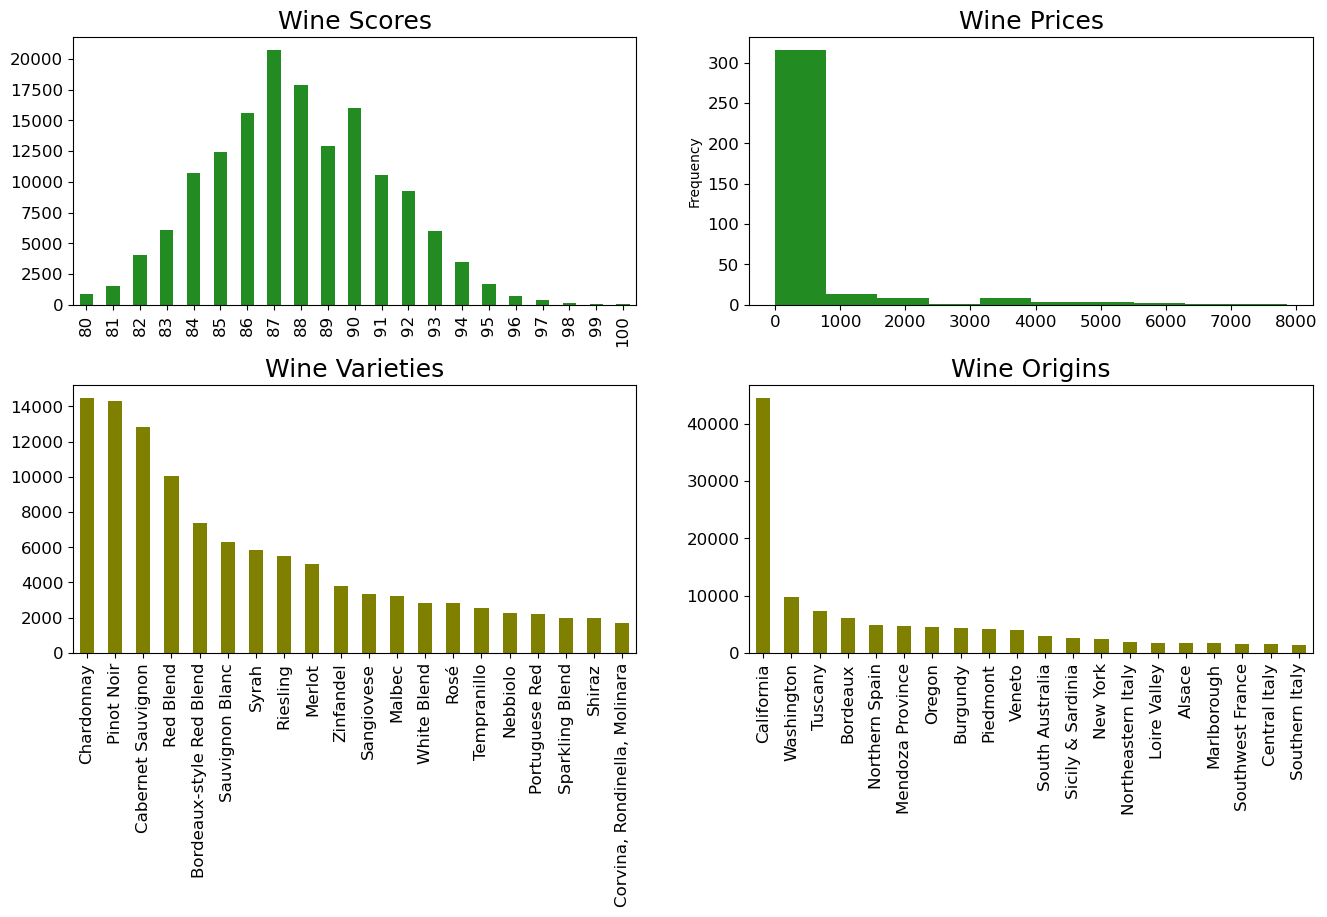

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    
reviews['points'].value_counts().sort_index().plot.bar(
    ax=axes[0][0], fontsize=12, color='forestgreen'
)
axes[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axes[1][0], fontsize=12, color='olive'
)
axes[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axes[1][1], fontsize=12, color='olive'
)
axes[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axes[0][1], fontsize=12, color='forestgreen'
)
axes[0][1].set_title("Wine Prices", fontsize=18)
    
# Расстояние между графиками
plt.subplots_adjust(hspace=.3) 

## 6. Визуализация с помощью Seaborn
библиотека визуализации данных на базе matplotlib для рисования красивых графиков.

| Столбчатая диаграмма (Count (Bar) Plot) | Линейный график (KDE Plot) | Расширенная диаграмма рассеивания (Joint (Hex) Plot) | Скрипичная диаграмма (Violin Plot) |
| --- | --- | --- | --- |
| ![pic1](https://i.imgur.com/3cYy56H.png) | ![pic1](https://i.imgur.com/V9jAreo.png) | ![pic1](https://i.imgur.com/5a6dwtm.png) | ![pic1](https://i.imgur.com/ZSsHzrA.png) |

### 6.1. Столбчатая диаграмма

<AxesSubplot: xlabel='points', ylabel='count'>

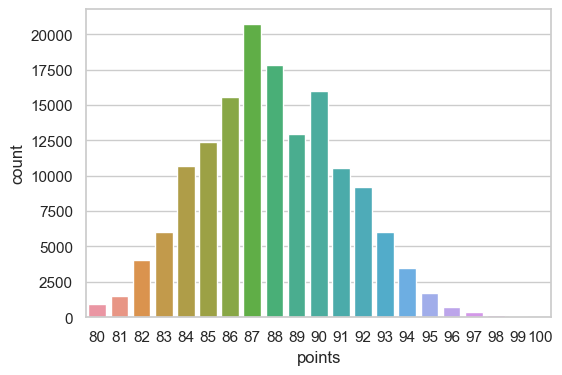

In [43]:
# Выбор цветовой схемы
sns.set_theme(style="whitegrid")

# Предварительно агрегировать данные не нужно
sns.countplot(x=reviews['points'])

### 6.2. Линейный график
Для сопоставления двух переменных

<AxesSubplot: xlabel='price', ylabel='points'>

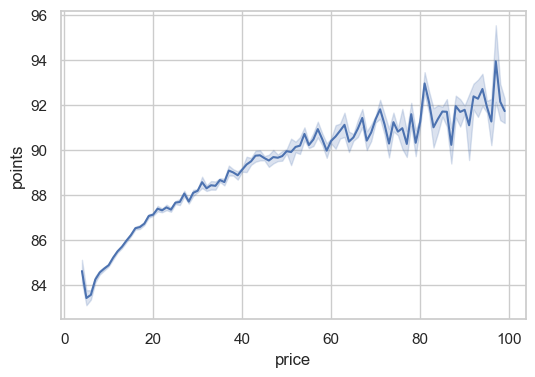

In [52]:
sns.lineplot(x='price', y='points',data = reviews[reviews.price <100])


Метод KDE полезен в случае если у нас много экстримальных значений/выбросов, например когда мы считаем частоты по цене вина

<AxesSubplot: >

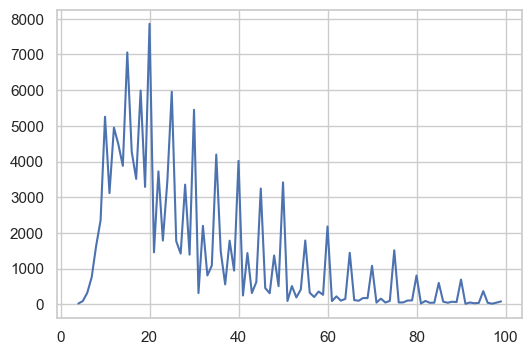

In [54]:
# для matplotlib
reviews[reviews['price'] < 100]['price'].value_counts().sort_index().plot.line()

<AxesSubplot: xlabel='price', ylabel='Density'>

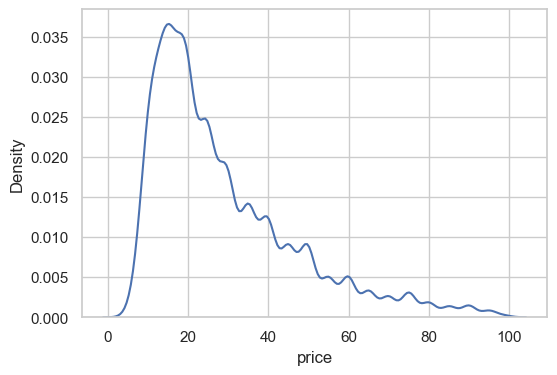

In [56]:
# для seaborn
sns.kdeplot(reviews.query('price < 100').price)

Таким образом мы получаем гладкую линию, которая показывает распределение цен на разные вина

### 6.3. Гистограмма histplot


<AxesSubplot: xlabel='points', ylabel='Count'>

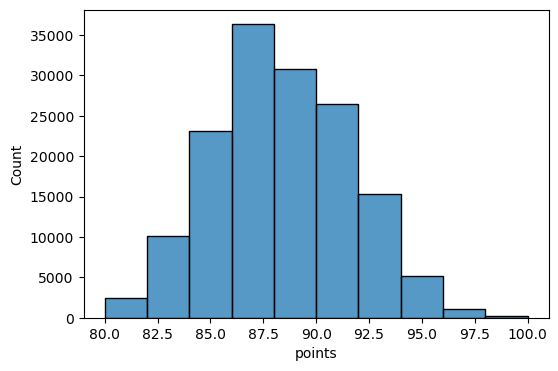

In [70]:
sns.histplot(reviews['points'], bins=10, kde=False)

<AxesSubplot: xlabel='price', ylabel='Count'>

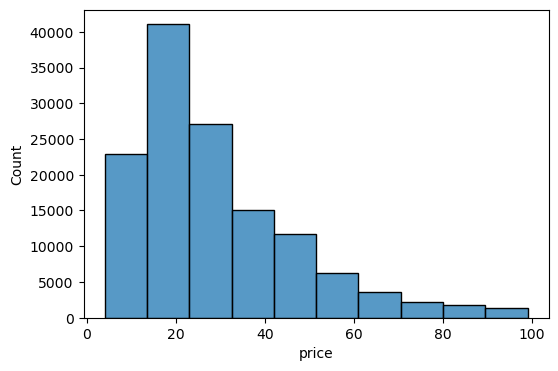

In [69]:
prices_available = reviews[(~reviews['price'].isna())&(reviews['price']<100)]
sns.histplot(prices_available['price'], bins=10, kde=False)

### 6.4. Расширенная диаграмма рассеивания

Так как это довольно сложная визуализация, то нам придется переключиться на более легковесный формат для нашего объекта.
Сделаем полны график, а потом ограничимся ценой в 100 долларов и сделаем выборку в 500 наблюдений.

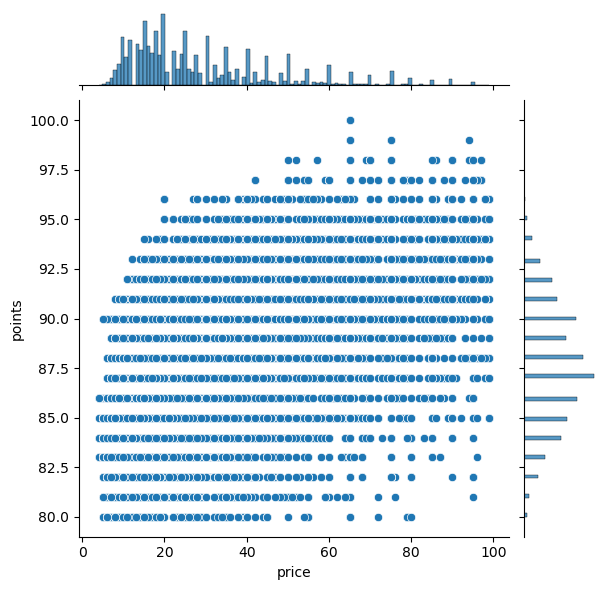

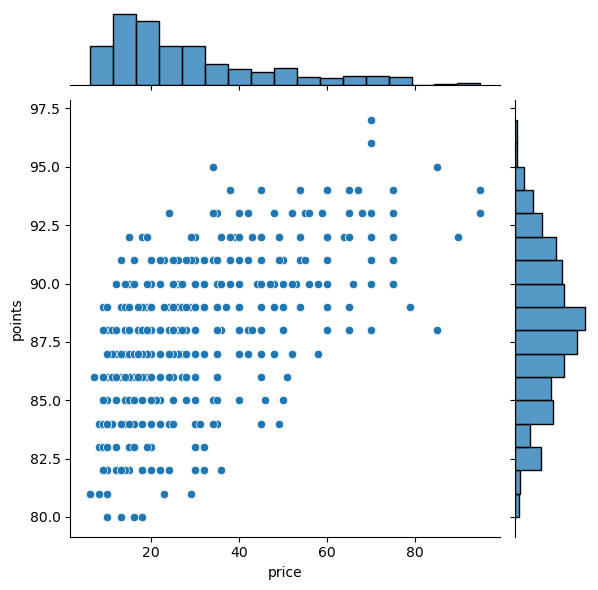

In [71]:
%config InlineBackend.figure_format = 'png' 
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100].sample(500))

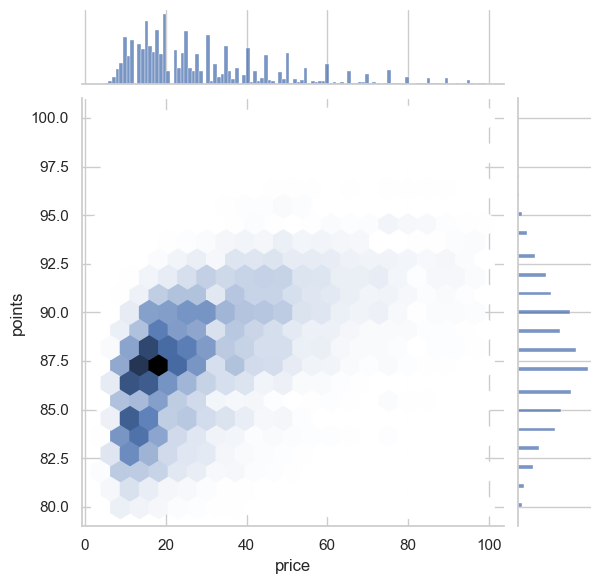

In [61]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

### 6.5. Box-plot и Violin diagram
Ящичковая диаграмма

In [65]:
# отфильтровали наблюдения по топ-5 винам
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

df.points.describe()

count    58982.000000
mean        88.323149
std          3.381981
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

<AxesSubplot: xlabel='variety', ylabel='points'>

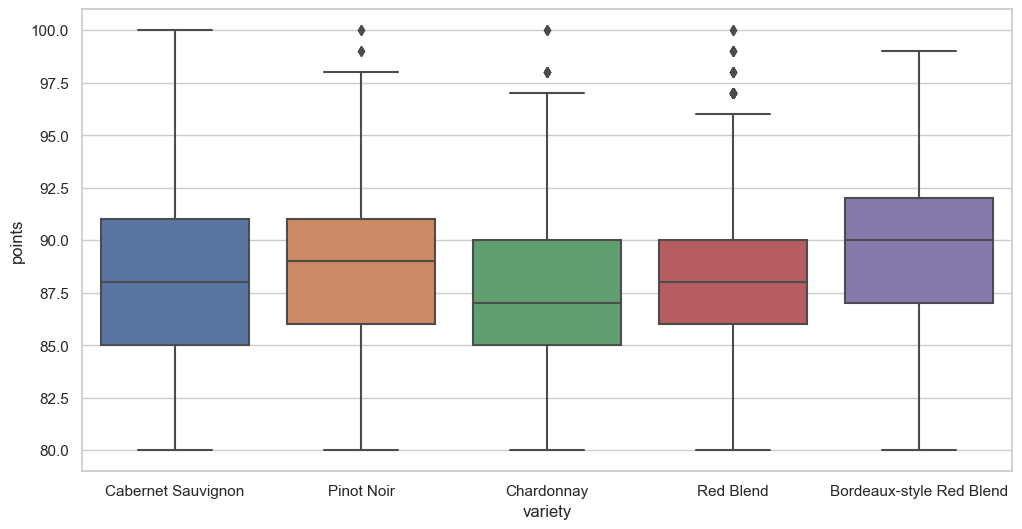

In [67]:
# строим boxplot из matplotlib
fig, ax = plt.subplots(figsize=(12,6))  
sns.boxplot(
    x='variety',
    y='points',
    data=df
)

<AxesSubplot: xlabel='variety', ylabel='points'>

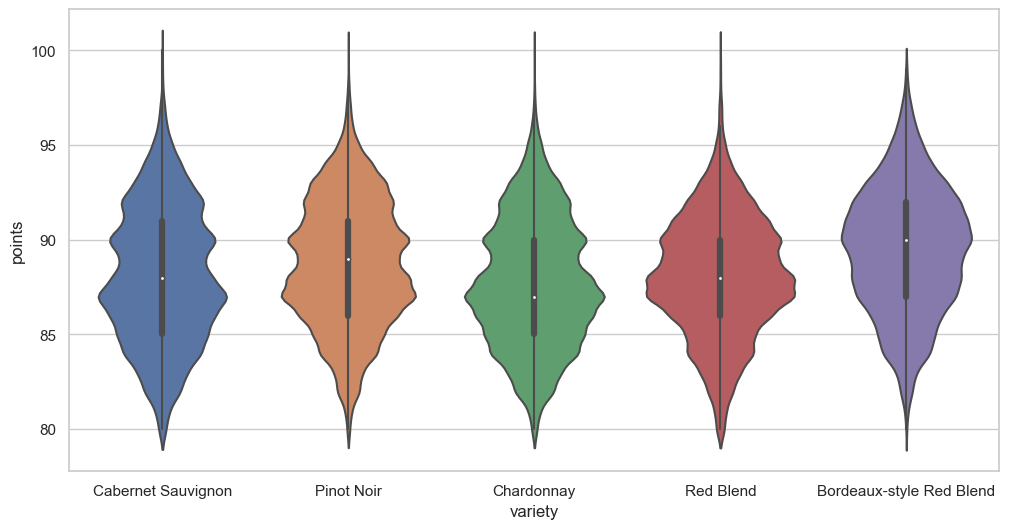

In [68]:
# строим Violin Plot
# показывает не только центральную статистику по категории, 
# но и плотность распределения наблюдений
fig, ax = plt.subplots(figsize=(12,6))  
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

### 6.6. Heatmap
тепловая карта по распределению какого-либо численного признака

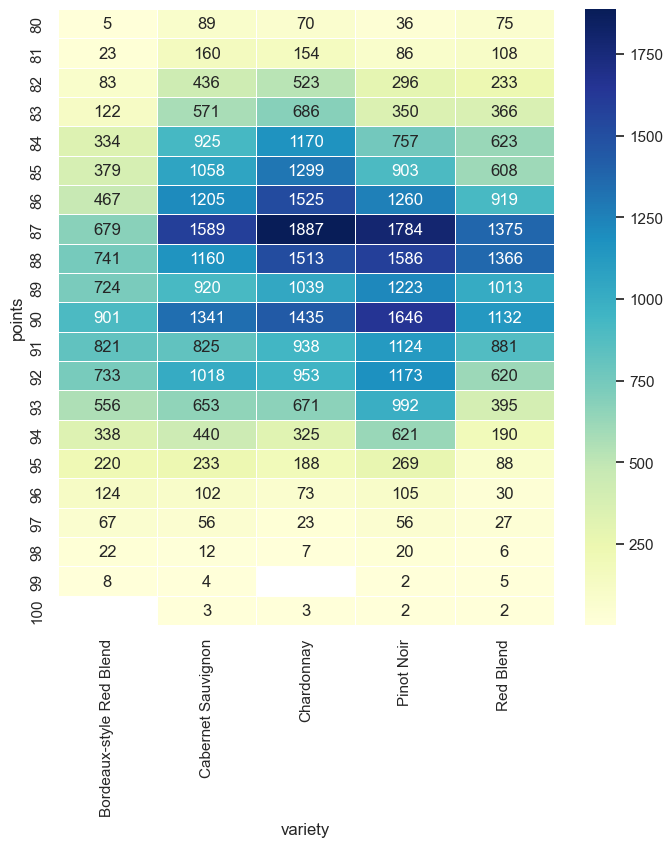

In [71]:
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(wine_counts, annot=True, fmt=".0f", linewidths=.5, cmap="YlGnBu", ax=ax);

In [68]:
reviews[(reviews['price']).isna()]


,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida
82,Italy,"Berry, baking spice, dried iris, mint and a hi...",Palliano Riserva,91,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste
116,Spain,Aromas of brandied cherry and crème de cassis ...,Dulce Tinto,86,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita
...,...,...,...,...,...,...,...,...,...,...
150377,New Zealand,"Light and a bit herbal, like a pleasant St.-Jo...",Matheson,84,NaN,Hawke's Bay,NaN,NaN,Syrah,Matua Valley
150378,New Zealand,"Impressive purple color, but less intense on t...",NaN,84,NaN,Martinborough,NaN,NaN,Syrah,Kusuda
150587,Canada,"Shows pronounced oily, earthy, almost tobacco-...",Icewine,90,NaN,Ontario,Lake Erie North Shore,NaN,Riesling,Colio
150673,US,"Cherry-scented, clean and fruity. Good concent...",NaN,87,NaN,California,Dry Creek Valley,Sonoma,Zinfandel,Taft Street


## Дополнительно

Данные можно формировать в виде дашборда.
`Дашборд` – это интерактивная аналитическая панель.  
Дашборд формируют так, что бы он мог наглядно и эффективно показать проблематику исследования.  
Также, данный инструмент позволяет отслеживать тенденции для разных временных отрезков.  
Пример дашборда - Яндекс Метрика, который показывает, как менялась посещаемость сайта поминутно и откуда на сайт пришли пользователи.

Если вы хотите сделать динамические дашборды, то воспользуйтесь фреймворком `dash`. Документацию вы можете изучить [по ссылке](https://dash.plotly.com).

